In [1]:
import numpy as np
import matplotlib.pylab as plt
import cmath

In [2]:
def Intensidad_difraccion(alpha):
    return (np.sin(alpha)/alpha)**2
def function_alpha(y_pos,wave_length):
    return np.pi*1.0*10**(-4)/(wave_length)*y_pos
def Intensidad_interferencia(y_pos,wave_length):
    return (np.cos((np.pi*35.6*10**(-5)*y_pos)/(wave_length)))**2

In [9]:
a=1.0*10**(-4)
Lam=575*10**(-9)
d=35.6*10**(-5)
D_1=.5
D_2=.5
#exponencial_1=cmath.exp(2*np.pi*1j*(D_1+D_2)/Lam)
#exponencial_1=np.sqrt(exponencial_1.conjugate()*exponencial_1).real
N=300
lim_z=0.005
lim_x=a*0.5
#x=np.linspace(-a*0.5,a*0.5)
y=np.linspace(-0.5*d,-0.5*d-a)
y=np.append(y,np.linspace(0.5*d,0.5*d+a))
I_z=[]
for i_z in range(N+1):
    delta_z=2.0*lim_z/N
    z=delta_z*i_z-lim_z
    integral=0.0
    for i_x in range(N+1):
            delta_x=2.0*lim_x/N
            x=delta_x*i_x-lim_x
            exponential_2=np.exp(np.pi*1j*(x-y)**2/(D_1*Lam))
            exponential_3=np.exp(np.pi*1j*(y-z)**2/(D_2*Lam))
            integral += np.trapz(exponential_2*exponential_3,y)*delta_x
    integral=np.sqrt(integral.conjugate()*integral).real
    #I_z.append(integral*exponencial_1)
    I_z.append(integral)
I_z=np.array(I_z)

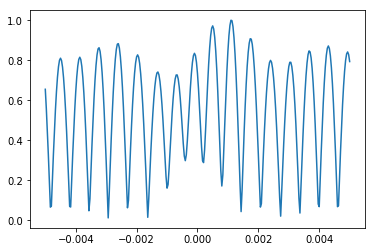

In [10]:
plt.plot(np.linspace(-lim_z,lim_z,N+1),1./np.max(I_z)*I_z)
plt.show()

In [13]:
def Feynman_integral(N,lim_z,rendijas="Dos",a=1.0*10**(-4),Lam=575*10**(-9),d=35.6*10**(-5),D_1=1.,D_2=1.):
    #N es el número de puntos que se quiere hacer y lim_z es el rango en donde se quiere ver la difracción
    lim_x=a*0.5
    if rendijas=="Dos":
        y=np.linspace(-0.5*d,-0.5*d-a)
        y=np.append(y,np.linspace(0.5*d,0.5*d+a))
        I_z=[]
        for i_z in range(N+1):
            delta_z=2.0*lim_z/N
            z=delta_z*i_z-lim_z
            integral=0.0
            for i_x in range(N+1):
                    delta_x=2.0*lim_x/N
                    x=delta_x*i_x-lim_x
                    exponential_2=np.exp(np.pi*1j*(x-y)**2/(D_1*Lam))
                    exponential_3=np.exp(np.pi*1j*(y-z)**2/(D_2*Lam))
                    integral += np.trapz(exponential_2*exponential_3,y)*delta_x
            integral=np.sqrt(integral.conjugate()*integral).real
            I_z.append(integral)
        I_z=np.array(I_z)
        return I_z
    elif rendijas=="Una":
        y=np.linspace(-0.5*d,-0.5*d-a)
        I_z=[]
        for i_z in range(N+1):
            delta_z=2.0*lim_z/N
            z=delta_z*i_z-lim_z
            integral=0.0
            for i_x in range(N+1):
                    delta_x=2.0*lim_x/N
                    x=delta_x*i_x-lim_x
                    exponential_2=np.exp(np.pi*1j*(x-y)**2/(D_1*Lam))
                    exponential_3=np.exp(np.pi*1j*(y-z)**2/(D_2*Lam))
                    integral += np.trapz(exponential_2*exponential_3,y)*delta_x
            integral=np.sqrt(integral.conjugate()*integral).real
            I_z.append(integral)
        I_z=np.array(I_z)
        return I_z      

In [14]:
 Feynman_integral(300,0.005)

array([4.46276904e-08, 4.32562665e-08, 4.16056227e-08, 3.96883743e-08,
       3.75189364e-08, 3.51134540e-08, 3.24897481e-08, 2.96673039e-08,
       2.66673450e-08, 2.35130934e-08, 2.02304496e-08, 1.68497136e-08,
       1.34102512e-08, 9.97516919e-09, 6.68985345e-09, 4.09231238e-09,
       3.99391071e-09, 6.49150087e-09, 9.71611386e-09, 1.30836699e-08,
       1.64413238e-08, 1.97257529e-08, 2.28993242e-08, 2.59343145e-08,
       2.88079086e-08, 3.15003280e-08, 3.39940518e-08, 3.62734748e-08,
       3.83247549e-08, 4.01357493e-08, 4.16959918e-08, 4.29966889e-08,
       4.40307229e-08, 4.47926560e-08, 4.52787313e-08, 4.54868689e-08,
       4.54166569e-08, 4.50693353e-08, 4.44477742e-08, 4.35564452e-08,
       4.24013859e-08, 4.09901596e-08, 3.93318081e-08, 3.74368003e-08,
       3.53169761e-08, 3.29854873e-08, 3.04567386e-08, 2.77463309e-08,
       2.48710169e-08, 2.18486876e-08, 1.86984324e-08, 1.54408000e-08,
       1.20986641e-08, 8.70039380e-09, 5.29579506e-09, 2.12926371e-09,
      

1.0